Code for plotting data from training and test set with classification

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
import pickle
import matplotlib.pyplot as plt

from data_handling_L1 import pre_process


### Import data from pickle
data_path = 'C:/Githubs/kandidat/Low_freq_files/Neural Network/data_files_2s.pkl'
model_path = 'C:/Githubs/kandidat/Low_freq_files/Neural Network/model_low_freq.pt'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
#Define all parameters
total_iterations = 2000 # total number of iterations
batch_size = 100

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=3, out_channels=128, kernel_size=8, stride=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, stride=1)
        self.bn2 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()

        self.conv3 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()

        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(128, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.tensor(x, dtype=self.conv1.weight.dtype).to(device)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = self.softmax(x)

        return x

In [5]:
with open(data_path, 'rb') as f:
    data_list = pickle.load(f)

net = torch.load(model_path, map_location=device)
net.to(device)

net.eval()

data_processed = pre_process(data_list) 

labels = [t[1] for t in data_processed]
data = [t[2] for t in data_processed]

test_data = data[-3000:]
test_labels = labels[-3000:]

test_data = np.array(test_data)
test_labels = np.array(test_labels)

test_data_reshaped = test_data.reshape(3000, 3, 512)

test_labels_tensor = torch.from_numpy(test_labels).float()
test_data_tensor = torch.from_numpy(test_data_reshaped).float()

#create teststet -----------------------------------------
testset = TensorDataset(test_data_tensor, test_labels_tensor)

testloader = DataLoader(testset, batch_size=1, shuffle=False)

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

C:\Users\joarl\AppData\Local\Temp\ipykernel_17288\2512127549.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=self.conv1.weight.dtype).to(device)


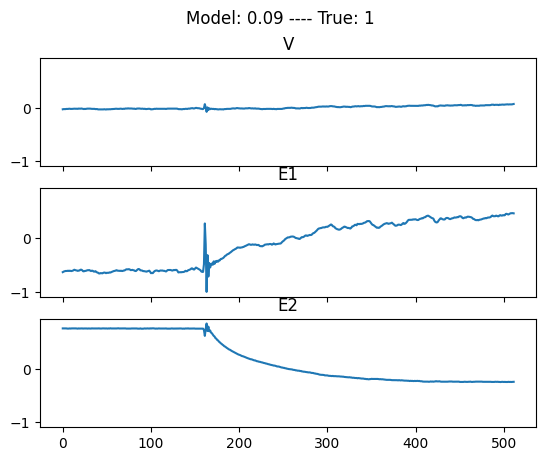

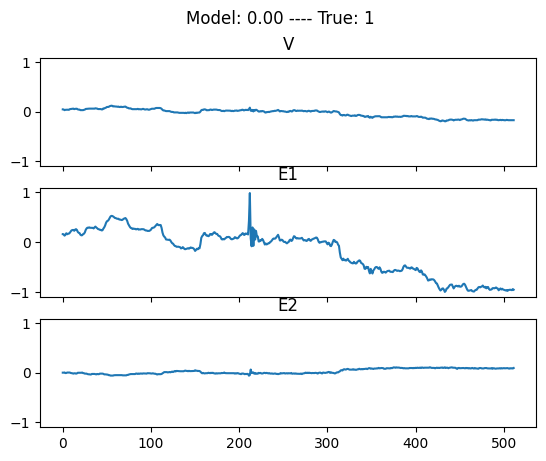

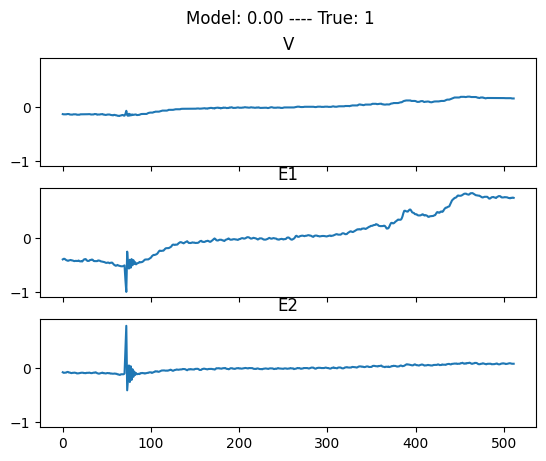

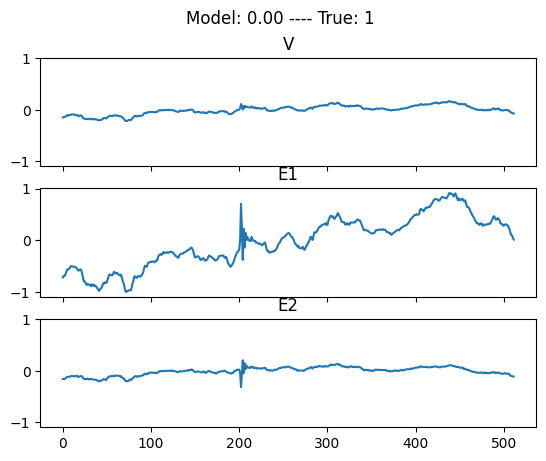

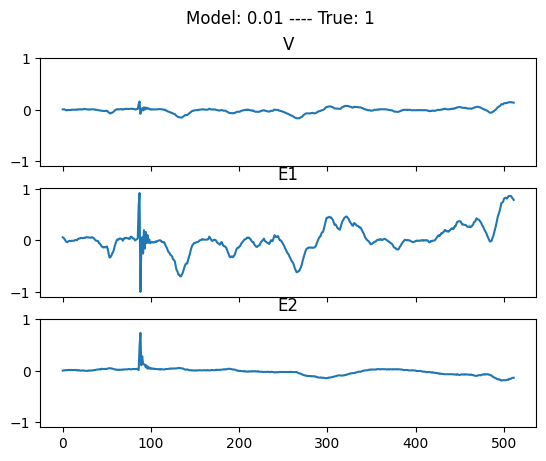

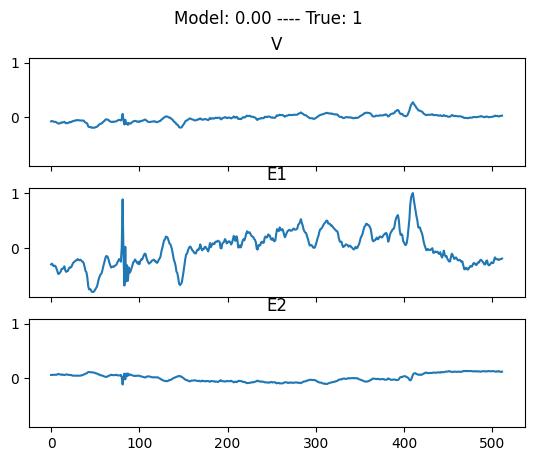

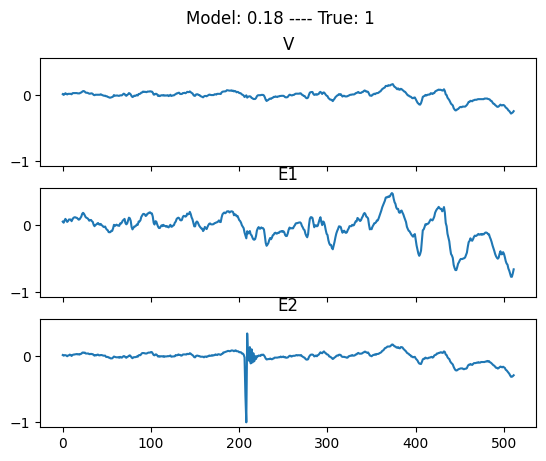

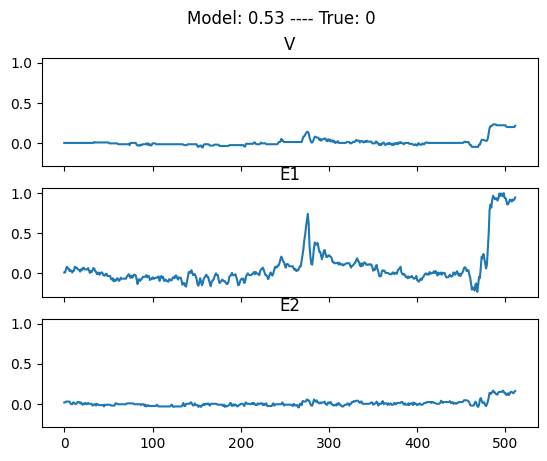

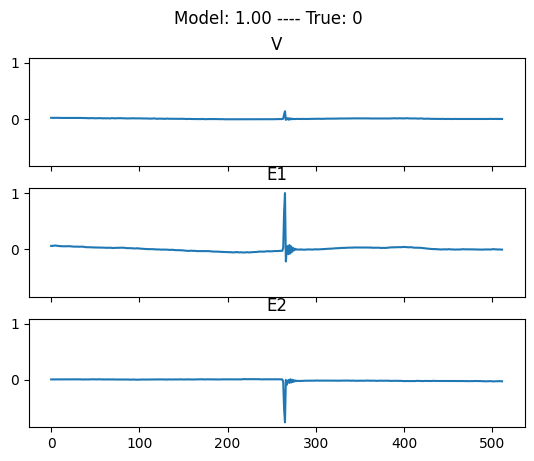

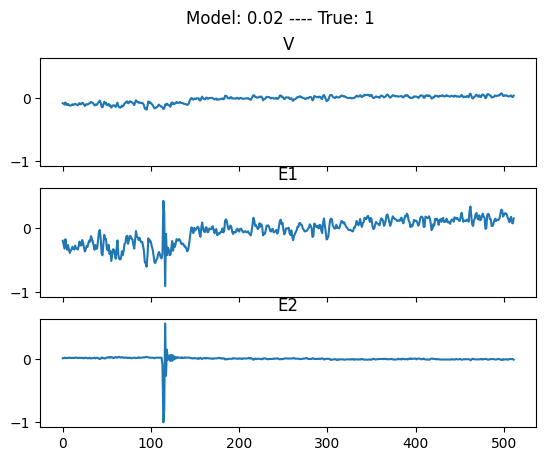

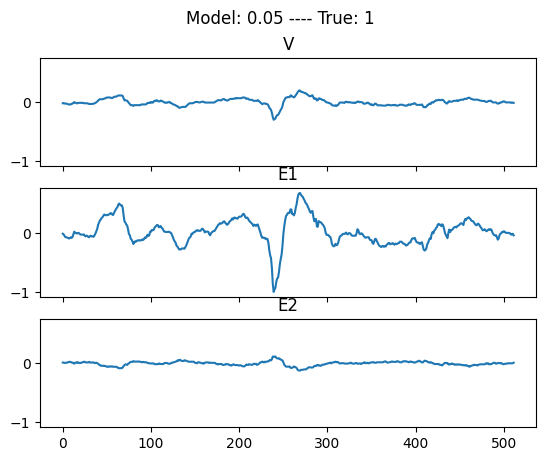

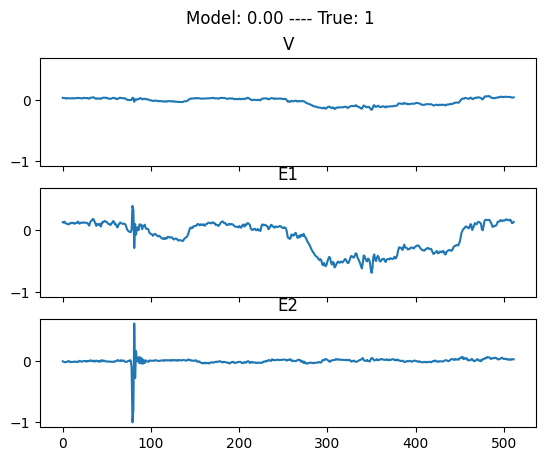

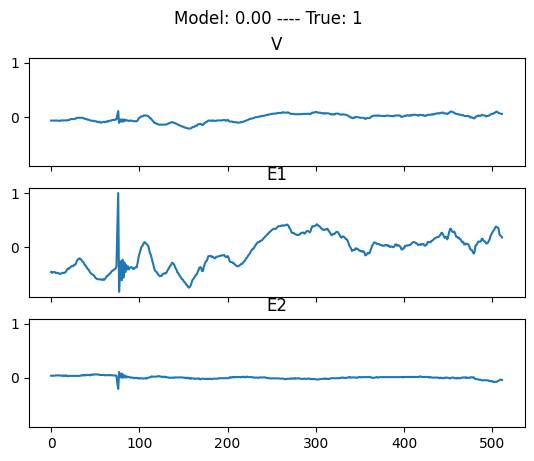

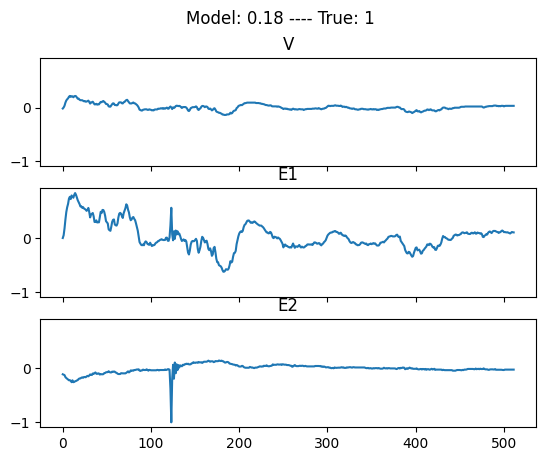

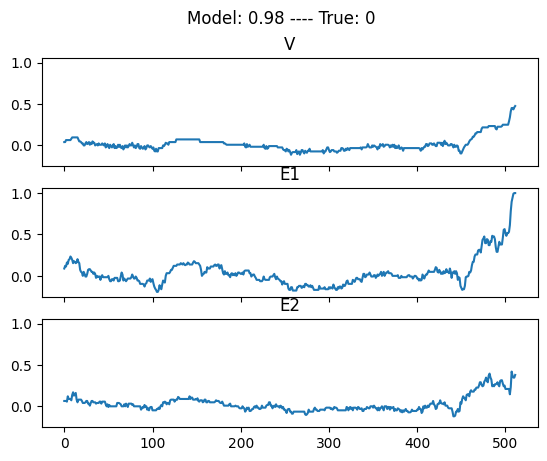

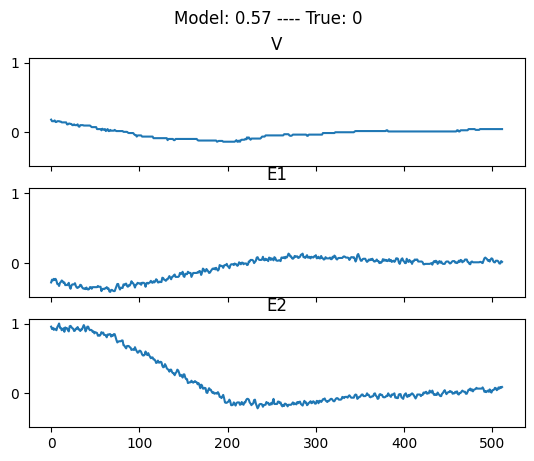

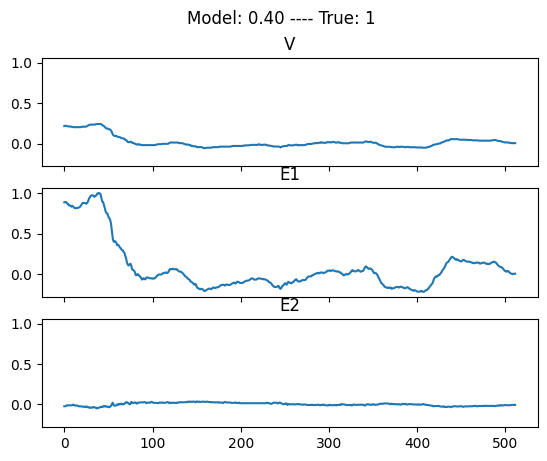

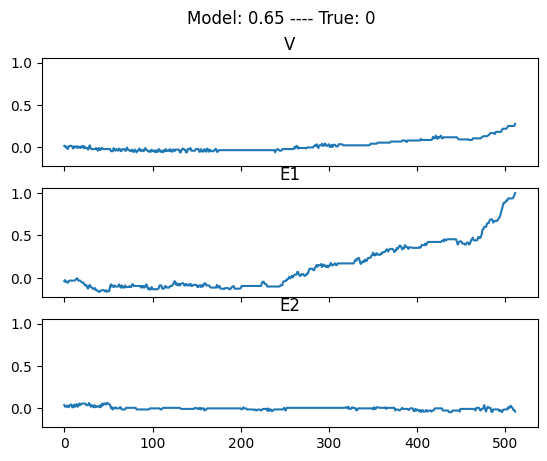

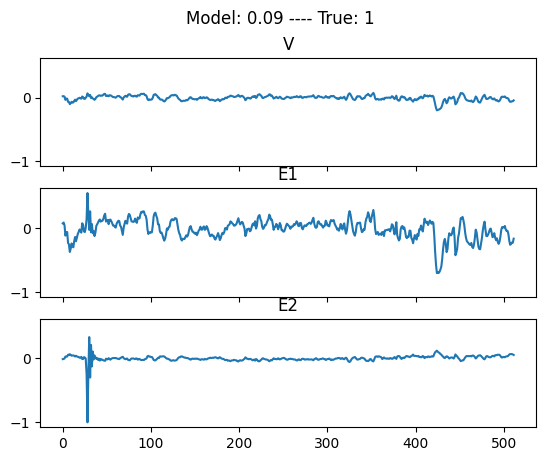

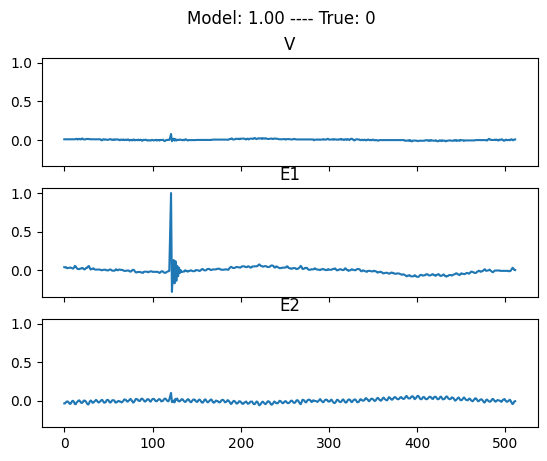

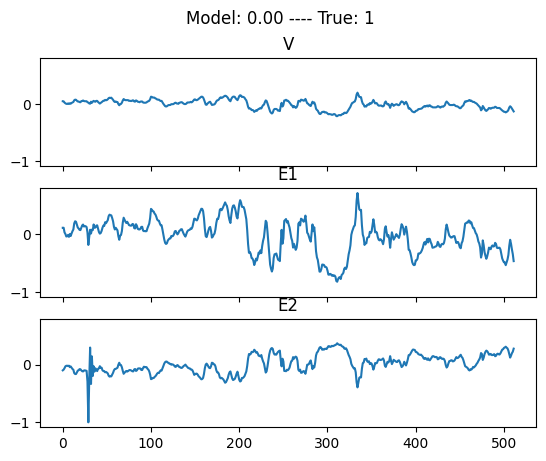

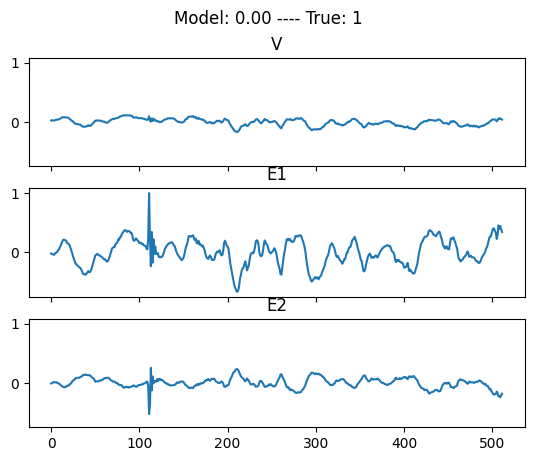

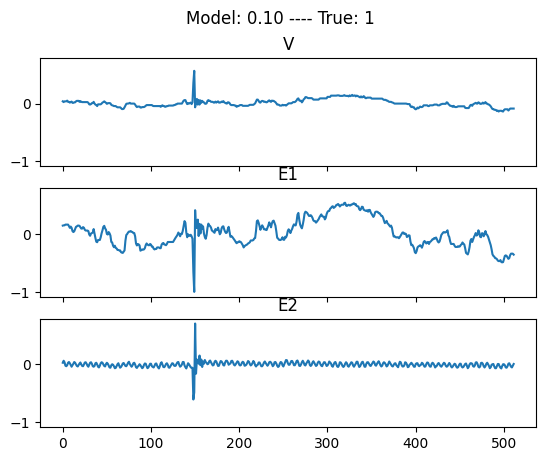

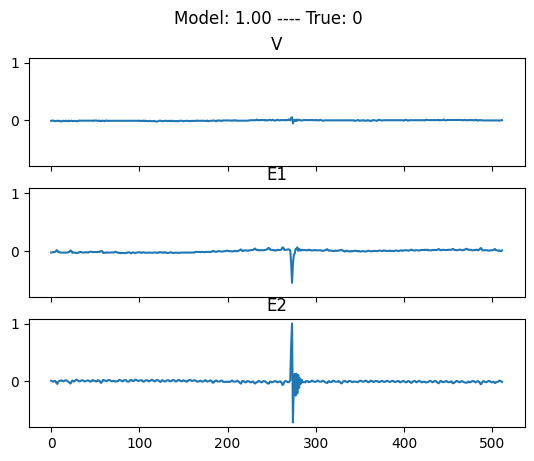

In [4]:
# Iterate over test data and make predictions
with torch.no_grad():
    predicted = []
    true_labels = []

    for wave, label in testloader:
        
        outputs = (net(wave).cpu().detach().numpy())[0]

        if outputs[1] > 0.5 and label == 0:

            wave = wave.numpy()
            label = int((label.numpy())[0])

            print()
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, sharey = True)

            ax1.plot(wave[0, :][0])
            ax2.plot(wave[0, :][1])
            ax3.plot(wave[0, :][2])

            ax1.set_title('V')
            ax2.set_title('E1')
            ax3.set_title('E2')

            fig.suptitle(f'Model: {outputs[1]:.2f} ---- True: {label}')

            plt.show()

        if outputs[1] < 0.5 and label == 1:

            wave = wave.numpy()
            label = int((label.numpy())[0])

            print()
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, sharey = True)

            ax1.plot(wave[0, :][0])
            ax2.plot(wave[0, :][1])
            ax3.plot(wave[0, :][2])

            ax1.set_title('V')
            ax2.set_title('E1')
            ax3.set_title('E2')

            fig.suptitle(f'Model: {outputs[1]:.2f} ---- True: {label}')

            plt.show()